# PRÁCTICA 3
## Análisis estadístico de señales

Maria Julieth Ostos,
Cristian Florez

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [2]:
#Lectura de los datos
data=scipy.io.loadmat('signals.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015',
 '__version__': '1.0',
 '__globals__': [],
 'Fs': array([[1024]], dtype=uint16),
 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
         4365.31103516, 4370.91796875]]),
 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
         -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]),
 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
         220.4135886 , 151.5810508 ]]),
 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
         -539.9349533 , -772.65519631]]),
 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
         1416.109375  , 1352.75012207]]),
 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
         -3791.24267578, -3924.6550293 , -4109.94433594]])}

•	Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:

In [3]:
def xrms(N,signal):
    signal = np.array(signal)
    
    # Calcular el RMS
    rms_value = np.sqrt((1/N)*np.mean(signal**2))
    
    return rms_value

In [4]:
print(xrms(5,data["ECG_asRecording"]))


1964.595145564838


In [5]:
#Vector tiempo
Fs=data['Fs'][0][0] #frec de muestreo
N=np.shape(data['ECG_asRecording'])[1] #cantidad de muestras
t=np.linspace(0,(N/Fs),N) 

In [9]:
print(t)

[0.00000000e+00 9.76594290e-04 1.95318858e-03 ... 2.99980468e+01
 2.99990234e+01 3.00000000e+01]


•	Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

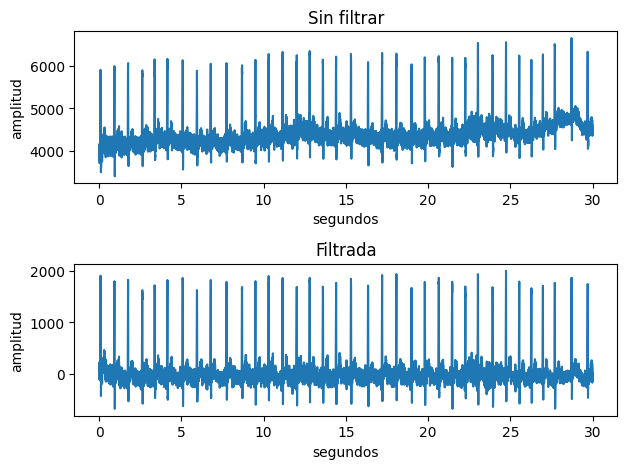

In [6]:
plt.subplot(2,1,1) #Señal sin filtro
plt.plot(t,data['ECG_asRecording'][0])
plt.title('Sin filtrar')
plt.xlabel('segundos')
plt.ylabel('amplitud')
plt.subplot(2,1,2) #señal con filtro
plt.plot(t,data['ECG_filtered'][0],label='Filtrada')
plt.title('Filtrada')
plt.xlabel('segundos')
plt.ylabel('amplitud')
plt.tight_layout()

La señal filtrada se le redujo la linea de tendencia ya que paso de ser de 4000 a 0 ya que elimino el offset, tambien las oscilaciones de baja amplitud por lo cual se ve una tendencia lineal

•	Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

Promedio: 4111.298903537327, RMS: 137.36774251378463, Varianza: 80128.34077287119, Desv. Estándar: 283.06949813229824


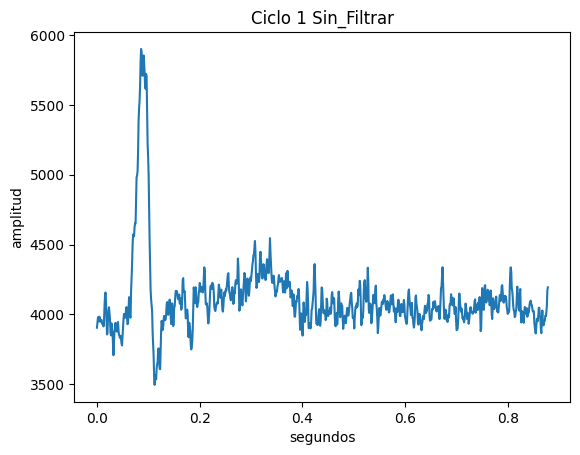

In [7]:
asRecorded=data['ECG_asRecording'][0]
num_muestras=900 #mediciones por ciclo
def graf_signal(muestras,signal,nombre):
    ciclo1=signal[0:muestras] 
    tciclo=t[0:muestras]
    plt.plot(tciclo,ciclo1)
    plt.title('Ciclo 1 '+nombre)
    plt.xlabel('segundos')
    plt.ylabel('amplitud')
    mean_ciclo1=np.mean(ciclo1) 
    rms_ciclo1=xrms(muestras,ciclo1)
    var_ciclo1=np.var(ciclo1)
    std_ciclo1=np.std(ciclo1)
    print(f'Promedio: {mean_ciclo1}, RMS: {rms_ciclo1}, Varianza: {var_ciclo1}, Desv. Estándar: {std_ciclo1}')
    
graf_signal(num_muestras,asRecorded,"Sin_Filtrar")

La varianza da un numero bastante alto debido a la gran diferencia de amplitud del pico del complejo QRS en comparacion con el resto de la señal cuya amplitud es bastante baja dando un promedio de 4111 en comparación al pico máximo de casi 6000

•	Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior. 

Promedio: 74.95494387168023, RMS: 10.426249753971842, Varianza: 92217.7719281714, Desv. Estándar: 303.67379196791313


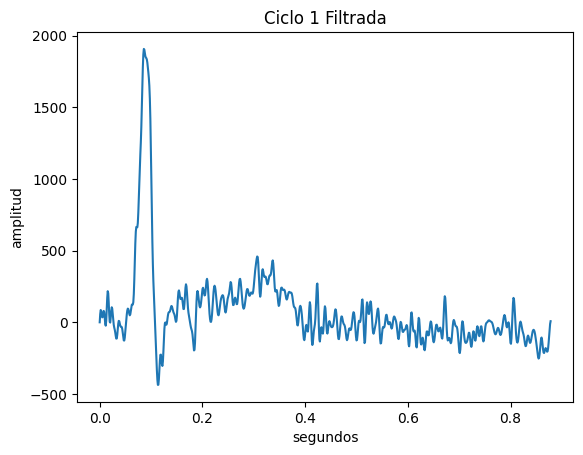

In [8]:
Filtered=data['ECG_filtered'][0]
graf_signal(num_muestras,Filtered,"Filtrada")

La varianza es mayor a la sin filtrar debido a que el filtro esta atenuando las bajas frecuencias haciendo que la diferencia que hay entre estas y el pico mayor sean aun mas grandes

•	Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria? 

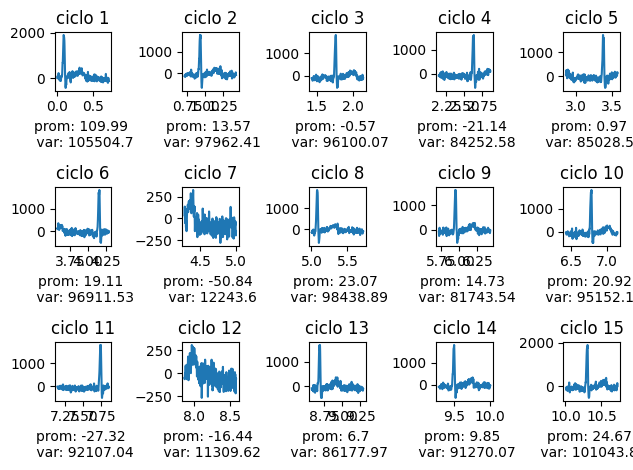

In [9]:
num_muestras=732 #mediciones por ciclo
N_ciclos=15
ciclos=[]
for i in range(N_ciclos):
    i_t=t[num_muestras*i:num_muestras*(i+1)]
    i_ciclo=Filtered[num_muestras*i:num_muestras*(i+1)]
    i_mean=np.round(np.mean(i_ciclo),2)
    i_var=np.round(np.var(i_ciclo),2)
    ciclos.append(i_ciclo)
    plt.subplot(3,5,i+1)
    plt.plot(i_t,i_ciclo)
    plt.title(f'ciclo {i+1}')
    plt.xlabel(f'prom: {i_mean} \n var: {i_var}')
plt.tight_layout()

•	Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).

In [10]:
#Normalidad
alpha=0.05 #valor de significancia
ciclos_num= [2,3,13,14]

for i in ciclos_num: 
    [statistic,pvalue]=stats.normaltest(ciclos[i])
    if pvalue > alpha:
        print(f'Ciclo {i} distribuye normal')
    else:
        print(f'Ciclo {i} no distribuye normal')

Ciclo 2 no distribuye normal
Ciclo 3 no distribuye normal
Ciclo 13 no distribuye normal
Ciclo 14 no distribuye normal


In [11]:
#HOMOCEDASTICIDAD 
[statistic,pvalue]=stats.levene(ciclos[2],ciclos[3],ciclos[13],ciclos[14])
print(pvalue)
if pvalue > alpha:
    print('Cumple supuesto de homocedasticidad') #varianzas no son significativamente diferentes
else:
    print('No cumple supuesto de homocedasticidad')

0.7039778502223384
Cumple supuesto de homocedasticidad


In [12]:
#Mann-Whitney
#entre ciclos 1 y 2
[statistic,pvalue]=stats.mannwhitneyu(ciclos[2],ciclos[3])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 2 y 3')
else:
    print('No existe diferencia significativa entre los ciclos 2 y 3') 
print(f'pvalue={pvalue}')
#entre ciclos 3 y 4
[statistic,pvalue]=stats.mannwhitneyu(ciclos[13],ciclos[14])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 13 y 14')
else:
    print('No existe diferencia significativa entre los ciclos 13 y 14') 
print(f'pvalue={pvalue}')

Existe diferencia estadística entre los ciclos 2 y 3
pvalue=0.0266697540441234
No existe diferencia significativa entre los ciclos 13 y 14
pvalue=0.10066532720000947


•	Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad) 

In [13]:

for i in ciclos_num:
    # dfuller=adfuller(ciclos[i])
    dfuller=adfuller((np.squeeze(ciclos[i])))
    if dfuller[1] > alpha: #dfuller[1] es el valor p
        print(f'Datos del ciclo {i+1} son estacionarios') #esto puede ser así o al revés 
    else:
        print(f'Datos del ciclo {i+1} no son estacionarios')
    print(f'pvalue={dfuller[1]}')
    print(f'ADF={dfuller[0]}','\n')

Datos del ciclo 3 son estacionarios
pvalue=0.7814334116791883
ADF=-0.9196473992136892 

Datos del ciclo 4 son estacionarios
pvalue=0.5391191022051909
ADF=-1.4886485028534966 

Datos del ciclo 14 son estacionarios
pvalue=0.4957500349202965
ADF=-1.575775030970835 

Datos del ciclo 15 son estacionarios
pvalue=0.3616296008495897
ADF=-1.8382789248390698 

